In [1]:
# Comparing OSPEX fits to the RHESSI microflares using different versions
# of the OSPEX CHIANTI dbase files, fitting with f_vth + bpow
# 
# Using 
# v5.2: 
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v52.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v52.sav
# v7.1 (sunkit-spex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v71.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v71.sav
# v9.0.1 (ospex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_01_250_unity_v901.geny
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_07_12_unity_v901_t41.geny
# v10.1 (newly generated by me using approx v9 setup for T and \lambda)
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_cont_1_250_unity_v101_t41.geny
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_lines_1_12_unity_v101_t41.geny
# 
# 6-Feb-2024    IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time

from scipy.special import beta

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14

In [3]:
# Load in the results files
r05=read_genx('wee_2024_vth52_bpow.genx')
r07=read_genx('wee_2024_vth71_bpow.genx')
r09=read_genx('wee_2024_vth90_bpow.genx')
r10=read_genx('wee_2024_vth101_bpow.genx')

In [4]:
# Restructure things to make it easier to work with
tmk05=[r["OSX_P"][1] for r in r05["SAVEGEN0"]]
em05=[r["OSX_P"][0]*1e49 for r in r05["SAVEGEN0"]]

tmk07=[r["OSX_P"][1] for r in r07["SAVEGEN0"]]
em07=[r["OSX_P"][0]*1e49 for r in r07["SAVEGEN0"]]

tmk09=[r["OSX_P"][1] for r in r09["SAVEGEN0"]]
em09=[r["OSX_P"][0]*1e49 for r in r09["SAVEGEN0"]]

tmk10=[r["OSX_P"][1] for r in r10["SAVEGEN0"]]
em10=[r["OSX_P"][0]*1e49 for r in r10["SAVEGEN0"]]

# Just check how many have been run in each file
print(f'Num flares v5.2: {np.count_nonzero(tmk05):.0f}')
print(f'Num flares v7.1: {np.count_nonzero(tmk07):.0f}')
print(f'Num flares v9.0: {np.count_nonzero(tmk09):.0f}')
print(f'Num flares v10.1: {np.count_nonzero(tmk10):.0f}')

Num flares v5.2: 24799
Num flares v7.1: 24799
Num flares v9.0: 24799
Num flares v10.1: 24799


### Note that the following plots contain all the fit results with no filtering for bad/poor fits

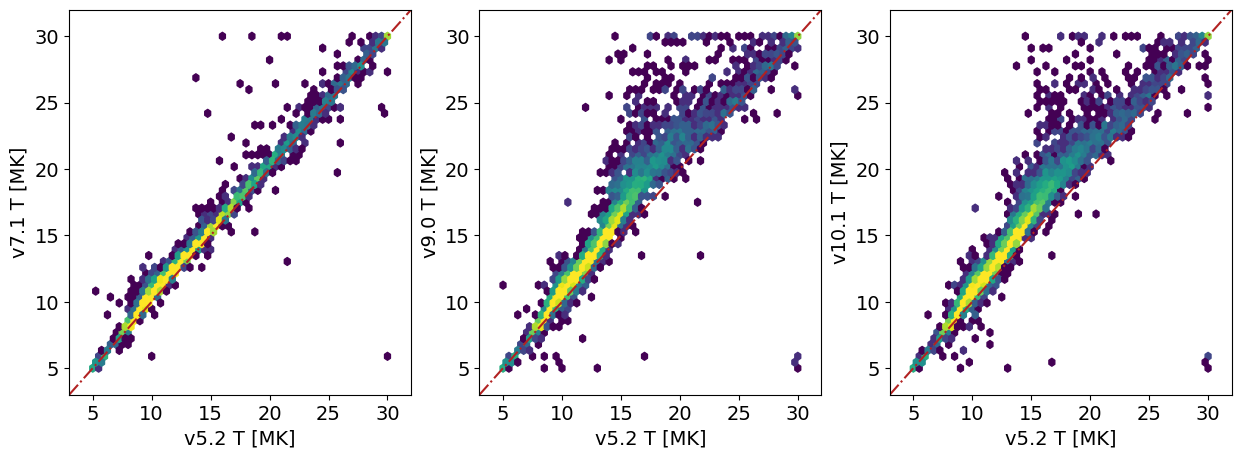

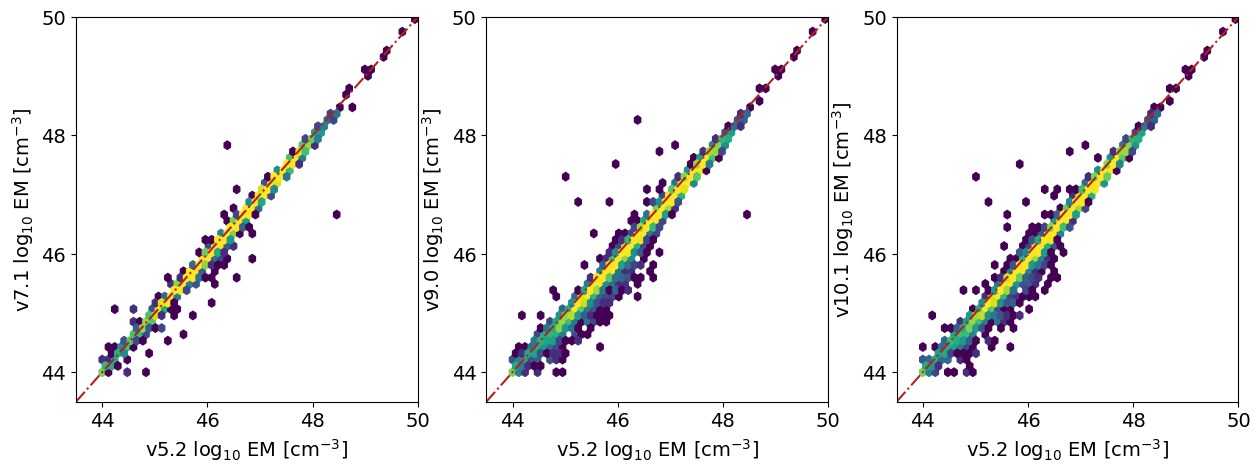

In [5]:
tmkr=[3,32]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(tmk05,tmk07,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 T [MK]')
axs[1].hexbin(tmk05,tmk09,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 T [MK]')
axs[2].hexbin(tmk05,tmk10,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 T [MK]')

for ax in axs:
    ax.set_xlim(tmkr)
    ax.set_ylim(tmkr)
    ax.plot(tmkr,tmkr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_xlabel('v5.2 T [MK]')
plt.show()
# ------------------------------------------------------
emr=[43.5,50]
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(np.log10(em05),np.log10(em07),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 log$_{10}$ EM [cm$^{-3}$]')
axs[1].hexbin(np.log10(em05),np.log10(em09),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 log$_{10}$ EM [cm$^{-3}$]')
axs[2].hexbin(np.log10(em05),np.log10(em10),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 log$_{10}$ EM [cm$^{-3}$]')

for ax in axs:
    ax.set_xlim(emr)
    ax.set_ylim(emr)
    ax.plot(emr,emr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 log$_{10}$ EM [cm$^{-3}$]')
plt.show()

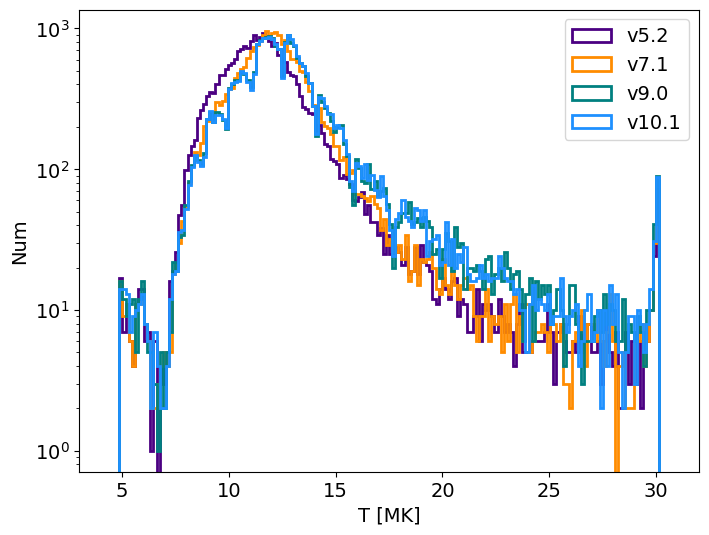

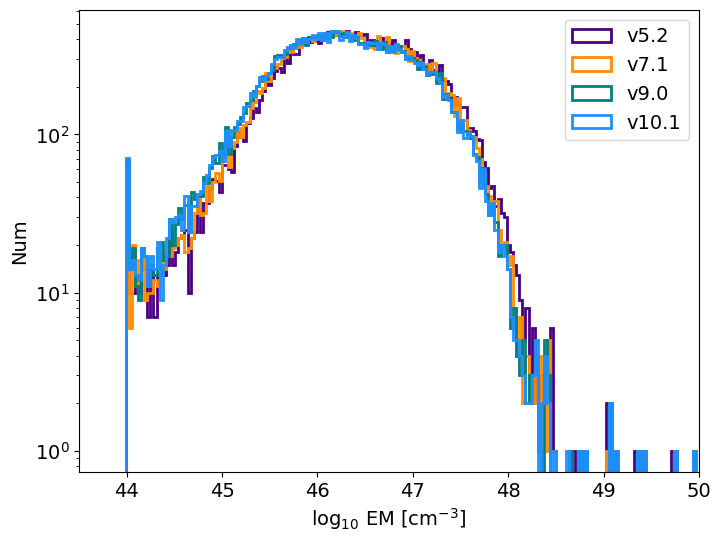

In [6]:
gs=200
tmkr=[3,32]
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(tmk05,bins=gs,range=tmkr,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(tmk07,bins=gs,range=tmkr,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(tmk09,bins=gs,range=tmkr,histtype='step',lw=2,color='teal',label='v9.0')
ax.hist(tmk10,bins=gs,range=tmkr,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(tmkr)
ax.set_ylabel('Num')
ax.set_xlabel('T [MK]')
ax.set_yscale('log')
plt.legend()
plt.show()

emr=[43.5,50]
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(np.log10(em05),bins=gs,range=emr,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(np.log10(em07),bins=gs,range=emr,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(np.log10(em09),bins=gs,range=emr,histtype='step',lw=2,color='teal',label='v9.0')
ax.hist(np.log10(em10),bins=gs,range=emr,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(emr)
ax.set_ylabel('Num')
ax.set_xlabel('log$_{10}$ EM [cm$^{-3}$]')
ax.set_yscale('log')
plt.legend()
plt.show()

## Thermal energy
For the thermal energy that is given by
\begin{equation}
W_\mathrm{th}=3nkTV=3\sqrt{(\xi_0 V) }kT
\end{equation}

where $T$ is the fitted temperature and $\xi_0=n^2V$ is the fitted emission measure (EM). This all assumes a filling factor of unity. In this work had fitted a loop/elongated ellipsoid to the 4-8 keV images and then the volume is assuming a cylindrical loop, i.e $V=\pi \left(w/2\right)^2 l$ with $w$ the loop width and $l$ the loop arc length.

In [7]:
#  Once sorted out the volumes can calculate thermal energy

---

## Non-thermal power and bpow parameters
In this work was fitting the non-thermal emission with a broken powerlaw in photon-space, i.e
\begin{equation}
I(\epsilon)\propto\begin{cases}
    \epsilon^{-\gamma_1}, & \text{if $\epsilon<\epsilon_\mathrm{B}$}\\
    \epsilon^{-\gamma_2}, & \text{if $\epsilon\geq\epsilon_\mathrm{B}$}
  \end{cases} \quad\mathrm{[photon\;s^{-1}\;keV^{-1}\;cm^{-2}]}
\end{equation}

where $\epsilon_\mathrm{B}$ is the break in the powerlaw, and $\gamma_1=1.5$ to represent the flattening at lower energies, and $\gamma_2$ the powerlaw index of interest, which for a thick-target model should be related to the electron distribution powerlaw index $\delta=\gamma_2+1$. Here the issue is that we do not know the low energy cutoff of the electron distribution $E_\mathrm{C}$ and first attempt is just using $E_\mathrm{C}=\epsilon_\mathrm{B}$.

For the non-thermal power calculation need the photon flux [photons $\mathrm{s}^{-1}$ $\mathrm{keV}^{-1}$ $\mathrm{cm}^{-2}$] of the powerlaw with index above the break at 1 keV, which we will call $A$, then
\begin{equation}
P(\geq E_\mathrm{C})=9.5\times10^{24}\gamma_2^2 (\gamma_2-1)\beta\left(\gamma_2-\frac{1}{2},\frac{3}{2}\right)AE_\mathrm{C}^{(1-\gamma_2)}\quad\mathrm{[erg\;s^{-1}]}
\end{equation}

where $\beta(p,q)$ is the Beta function. Note that the $9.5\times10^{24}$ was used in [Hannah et al. 2008](https://doi.org/10.1086/529012) and [Lin et al. 2001](https://doi.org/10.1086/323270) - actually [Lin 1974](https://doi.org/10.1007/BF00240886) has a factor of $3\times10^{24}$ quoting numerical errors from [Brown 1971](https://doi.org/10.1007/BF00149070). However Aschwanden 2004 (book, §13.2.2 derivation and Eqn 13.2.31, based off Brown 1971 number) and subsequently papers like [Aschwanden et al. 2019](https://doi.org/10.3847/1538-4357/ab2cd4) use $4.3\times10^{24}$ Which is correct - something to do with assumption about mean molecular mass or abundance, or cross section approximations? Of course now would just fit with the thick-target model of a powerlaw electron distribution $F(\geq E_\mathrm{C})\propto E^{-\delta}$ via the Holman code. So can numerically check all this - simulate a thick-target spectrum, fit with bpow and calculate the power and compare to what it show be.

OSPEX fitted a broken powerlaw with bpow and the normalisation parameter is the photon flux of the powerlaw from below the break at the epivot of 50 keV, i.e. $I_1(50)$. So need to convert that to the photon flux at the break - as there the two powerlaws match, i.e. $I_1(\epsilon_\mathrm{B})=I_2(\epsilon_\mathrm{B})$ - and then use that value to work out the photon flux of the powerlaw index above the break at 1 keV, i.e. $I_2(1)\equiv A$. 

For the powerlaw below the break we assume some scaling constant $K_1$, so $I_1(\epsilon)=K_1\epsilon^{-1.5}$ then for the normalisation value from bpow $I_1(50)$ we get
\begin{equation}
I_1(50)=K_1 50^{-1.5}\quad \Rightarrow\quad K_1=I_1(50)/50^{-1.5}
\end{equation}
Then at the break energy the two power laws match, i.e.
\begin{equation}
I_1(\epsilon_\mathrm{B})=I_2(\epsilon_\mathrm{B})\quad \Rightarrow\quad I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}=K_2 \epsilon_\mathrm{B}^{-\gamma_2}\quad \Rightarrow\quad K_2=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2}
\end{equation} 
Hence $I_2(1)\equiv A$ is going to be
\begin{equation}
I_2(1)=K_2 1^{-\gamma_2}=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2} 1^{-\gamma_2}=I_1(50)\left(\frac{\epsilon_\mathrm{B}}{50}\right)^{-1.5}\epsilon_\mathrm{B}^{\gamma_2} \equiv A
\end{equation}

In [8]:
# sort out all the bpow parameters

# ph flux of powerlaw below break at 50 keV, I_1(50)
I5005=np.array([r["OSX_P"][3] for r in r05["SAVEGEN0"]])
# neg powerlaw index below the break -> fixed at 1.5
g105=np.array([r["OSX_P"][4] for r in r05["SAVEGEN0"]])
# broken powerlaw break energy [keV]
eb05=np.array([r["OSX_P"][5] for r in r05["SAVEGEN0"]])
# neg powerlaw index above the break
g205=np.array([r["OSX_P"][6] for r in r05["SAVEGEN0"]])


I5007=np.array([r["OSX_P"][3] for r in r07["SAVEGEN0"]])
g107=np.array([r["OSX_P"][4] for r in r07["SAVEGEN0"]])
eb07=np.array([r["OSX_P"][5] for r in r07["SAVEGEN0"]])
g207=np.array([r["OSX_P"][6] for r in r07["SAVEGEN0"]])

I5009=np.array([r["OSX_P"][3] for r in r09["SAVEGEN0"]])
g109=np.array([r["OSX_P"][4] for r in r09["SAVEGEN0"]])
eb09=np.array([r["OSX_P"][5] for r in r09["SAVEGEN0"]])
g209=np.array([r["OSX_P"][6] for r in r09["SAVEGEN0"]])

I5010=np.array([r["OSX_P"][3] for r in r10["SAVEGEN0"]])
g110=np.array([r["OSX_P"][4] for r in r10["SAVEGEN0"]])
eb10=np.array([r["OSX_P"][5] for r in r10["SAVEGEN0"]])
g210=np.array([r["OSX_P"][6] for r in r10["SAVEGEN0"]])

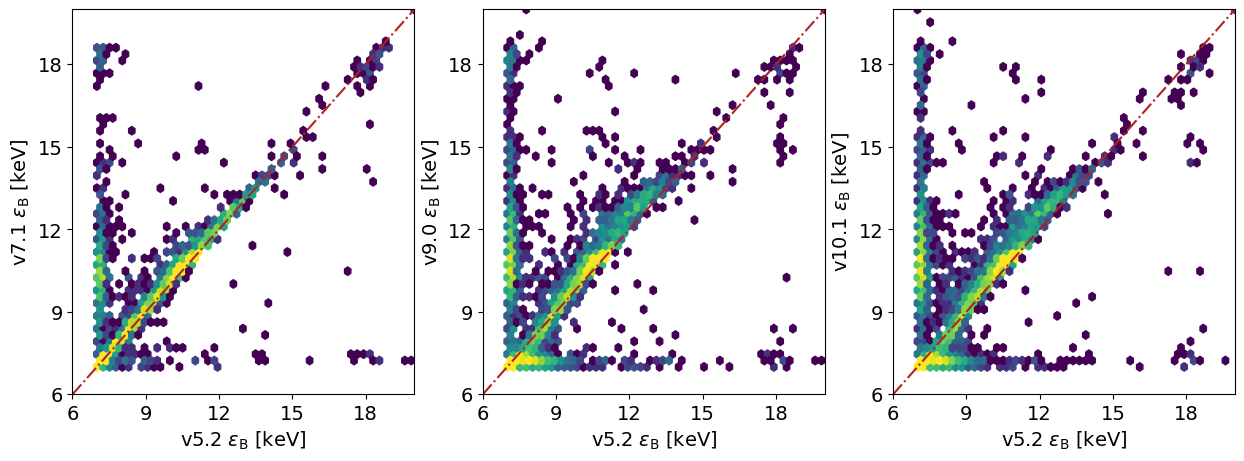

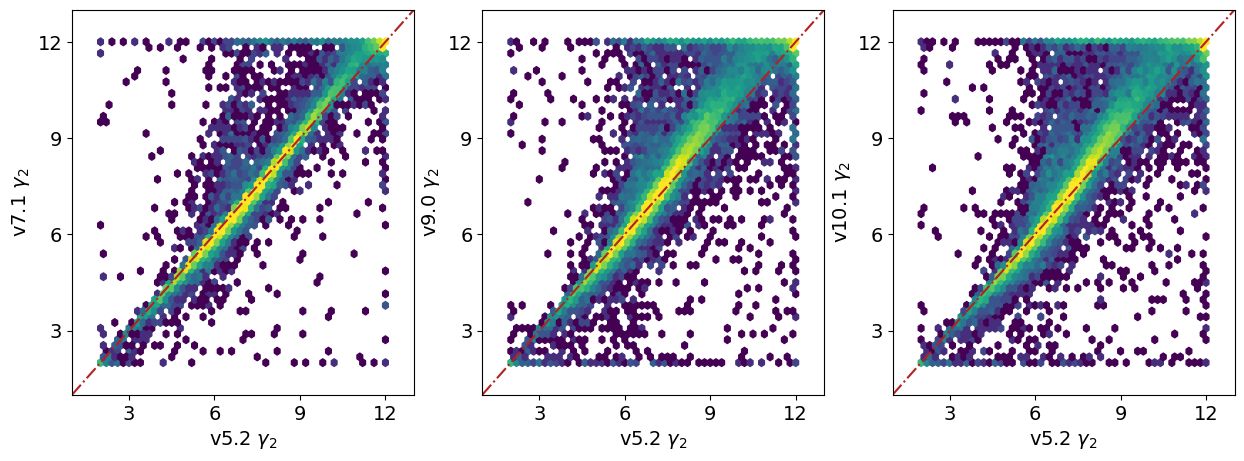

In [9]:
# comparison plots

ebr=[6,20]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(eb05,eb07,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 $\epsilon_\mathrm{B}$ [keV]')
axs[1].hexbin(eb05,eb09,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 $\epsilon_\mathrm{B}$ [keV]')
axs[2].hexbin(eb05,eb10,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 $\epsilon_\mathrm{B}$ [keV]')

for ax in axs:
    ax.set_xlim(ebr)
    ax.set_ylim(ebr)
    ax.plot(ebr,ebr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_xlabel('v5.2 $\epsilon_\mathrm{B}$ [keV]')
plt.show()
# ------------------------------------------------------

g2r=[1,13]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(g205,g207,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 $\gamma_2$')
axs[1].hexbin(g205,g209,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 $\gamma_2$')
axs[2].hexbin(g205,g210,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 $\gamma_2$')

for ax in axs:
    ax.set_xlim(g2r)
    ax.set_ylim(g2r)
    ax.plot(g2r,g2r,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 $\gamma_2$')
plt.show()
# ------------------------------------------------------

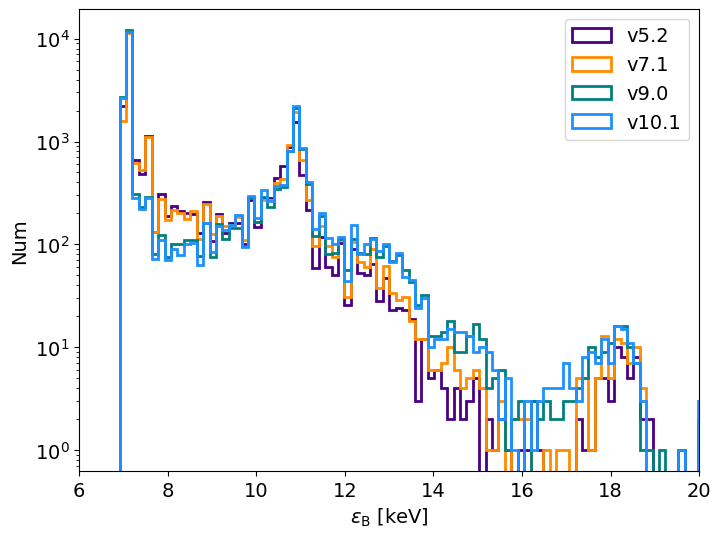

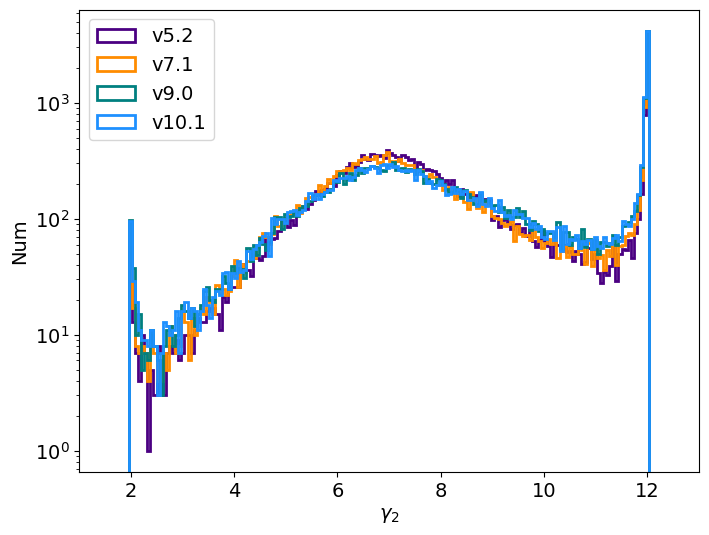

In [10]:
gs=200
ebr=[6,20]
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(eb05,bins=gs,range=tmkr,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(eb07,bins=gs,range=tmkr,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(eb09,bins=gs,range=tmkr,histtype='step',lw=2,color='teal',label='v9.0')
ax.hist(eb10,bins=gs,range=tmkr,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(ebr)
ax.set_ylabel('Num')
ax.set_xlabel('$\epsilon_\mathrm{B}$ [keV]')
ax.set_yscale('log')
plt.legend()
plt.show()

g2r=[1,13]
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(g205,bins=gs,range=g2r,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(g207,bins=gs,range=g2r,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(g209,bins=gs,range=g2r,histtype='step',lw=2,color='teal',label='v9.0')
ax.hist(g210,bins=gs,range=g2r,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(g2r)
ax.set_ylabel('Num')
ax.set_xlabel('$\gamma_2$')
ax.set_yscale('log')
plt.legend()
plt.show()

In [11]:
# # Calculate A
def calc_A(I50,g1,eb,g2):
    return I50*(eb/50.)**(-1*g1)*eb**(g2)

# # Calculate the non-thermal power, use the 9.5 factor for now....
def nn9pow(A,Ec,g2):
    return 9.5e24*g2**2*(g2-1)*beta(g2-0.5,1.5)*A*Ec**(1-g2)


A05=calc_A(I5005,g105,eb05,g205) 
nn9p05=nn9pow(A05,eb05,g205)

A07=calc_A(I5007,g107,eb07,g207) 
nn9p07=nn9pow(A07,eb07,g207)

A09=calc_A(I5009,g109,eb09,g209) 
nn9p09=nn9pow(A09,eb09,g209)

A10=calc_A(I5010,g110,eb10,g210) 
nn9p10=nn9pow(A10,eb10,g210)

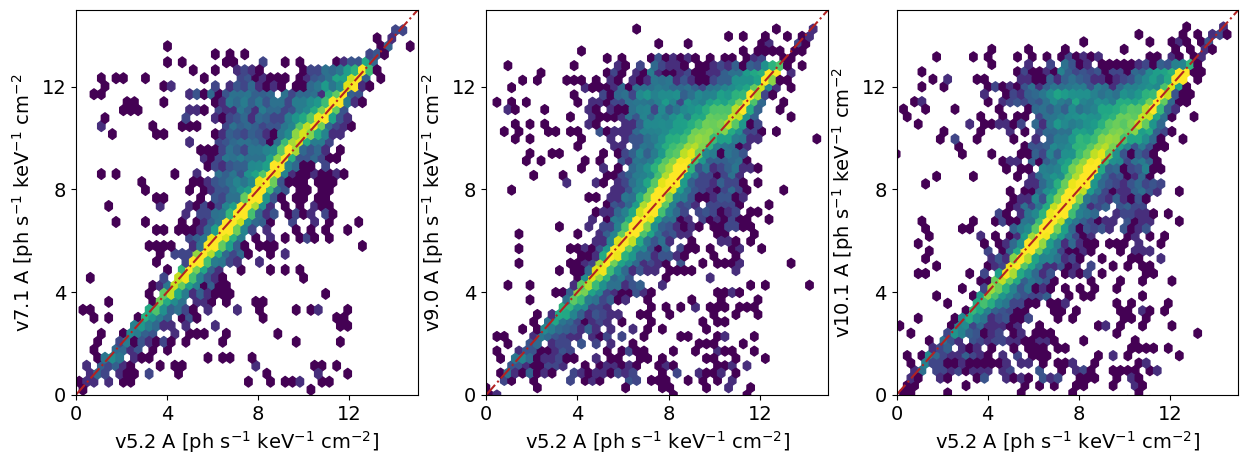

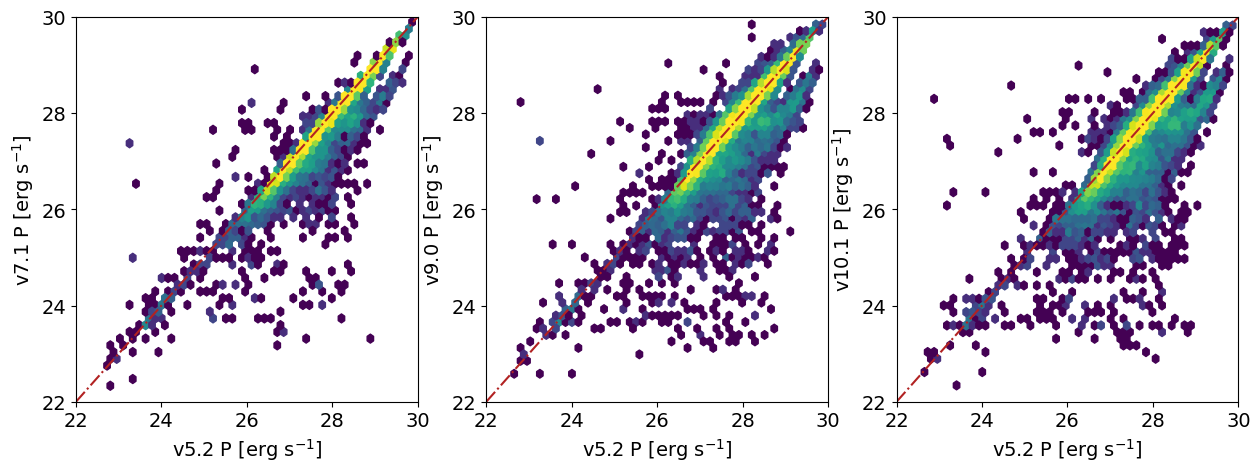

In [12]:
# ------------------------------------------------------

Ar=[0,15]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(np.log10(A05),np.log10(A07),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 A [ph s$^{-1}$ keV$^{-1}$ cm$^{-2}$')
axs[1].hexbin(np.log10(A05),np.log10(A09),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 A [ph s$^{-1}$ keV$^{-1}$ cm$^{-2}$')
axs[2].hexbin(np.log10(A05),np.log10(A10),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 A [ph s$^{-1}$ keV$^{-1}$ cm$^{-2}$')

for ax in axs:
    ax.set_xlim(Ar)
    ax.set_ylim(Ar)
    ax.plot(Ar,Ar,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 A [ph s$^{-1}$ keV$^{-1}$ cm$^{-2}$]')
plt.show()
# ------------------------------------------------------

nnr=[22,30]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(np.log10(nn9p05),np.log10(nn9p07),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 P [erg s$^{-1}$]')
axs[1].hexbin(np.log10(nn9p05),np.log10(nn9p09),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 P [erg s$^{-1}$]')
axs[2].hexbin(np.log10(nn9p05),np.log10(nn9p10),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 P [erg s$^{-1}$]')

for ax in axs:
    ax.set_xlim(nnr)
    ax.set_ylim(nnr)
    ax.plot(nnr,nnr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 P [erg s$^{-1}$]')
plt.show()
# ------------------------------------------------------

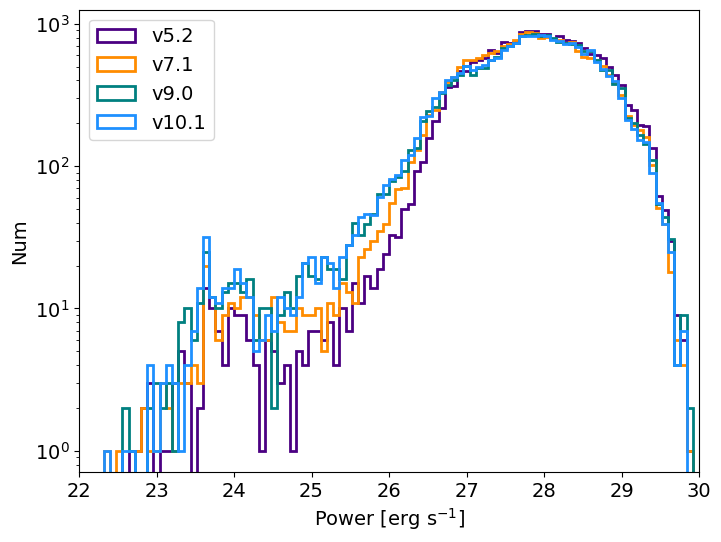

In [13]:
gs=100
nnr=[22,30]
fig,ax=plt.subplots(figsize=(8,6))
ax.hist(np.log10(nn9p05),bins=gs,range=nnr,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(np.log10(nn9p07),bins=gs,range=nnr,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(np.log10(nn9p09),bins=gs,range=nnr,histtype='step',lw=2,color='teal',label='v9.0')
ax.hist(np.log10(nn9p10),bins=gs,range=nnr,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(nnr)
ax.set_ylabel('Num')
ax.set_xlabel('Power [erg s$^{-1}$]')
ax.set_yscale('log')
plt.legend()
plt.show()

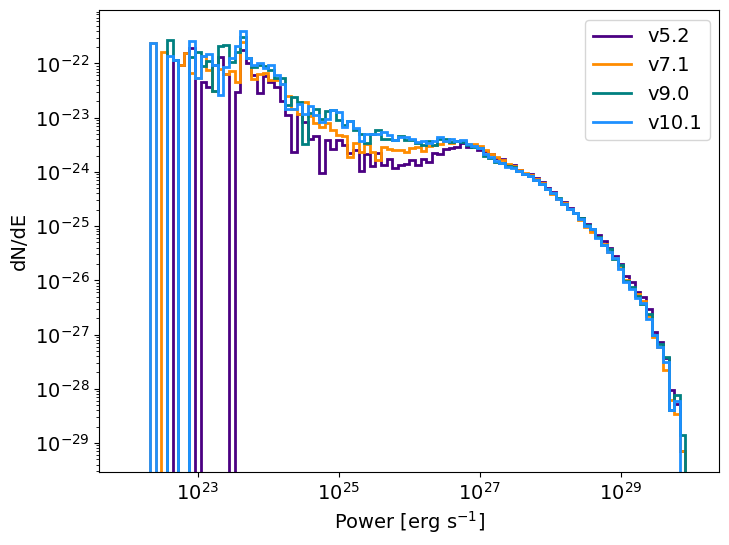

In [14]:
# But the distribution we really want is dN/dE
# So better to use numpy for the historgams and then plot
nnh05, ebins=np.histogram(np.log10(nn9p05),bins=100,range=nnr)
nnh07, ebins=np.histogram(np.log10(nn9p07),bins=100,range=nnr)
nnh09, ebins=np.histogram(np.log10(nn9p09),bins=100,range=nnr)
nnh10, ebins=np.histogram(np.log10(nn9p10),bins=100,range=nnr)

de=[10**ebins[i+1]-10**ebins[i] for i in range(len(ebins)-1)]

fig,ax=plt.subplots(figsize=(8,6))
ax.stairs(nnh05/de,10**ebins,lw=2,color='indigo',label='v5.2')
ax.stairs(nnh07/de,10**ebins,lw=2,color='darkorange',label='v7.1')
ax.stairs(nnh09/de,10**ebins,lw=2,color='teal',label='v9.0')
ax.stairs(nnh10/de,10**ebins,lw=2,color='dodgerblue',label='v10.1')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('dN/dE')
ax.set_xlabel('Power [erg s$^{-1}$]')
plt.legend()
plt.show()